In [137]:
# 사용할 기본 패키지 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
import os
import numpy as np

In [138]:
Basic_dir = os.path.dirname(os.path.dirname(os.path.realpath('EDA.ipynb')))
PATH = Basic_dir + '\\Data\\Data(HeartD_B)'
os.listdir(PATH)

['sample_submission(DT).csv',
 'sample_submission(KNN).csv',
 'sample_submission(LR).csv',
 'sample_submission(NB).csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [139]:
# 결측값 없음 / 15개의 열과 151개의 행으로 이루어진 데이터 구조
df_train = pd.read_csv(PATH + '\\train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        151 non-null    int64  
 1   age       151 non-null    int64  
 2   sex       151 non-null    int64  
 3   cp        151 non-null    int64  
 4   trestbps  151 non-null    int64  
 5   chol      151 non-null    int64  
 6   fbs       151 non-null    int64  
 7   restecg   151 non-null    int64  
 8   thalach   151 non-null    int64  
 9   exang     151 non-null    int64  
 10  oldpeak   151 non-null    float64
 11  slope     151 non-null    int64  
 12  ca        151 non-null    int64  
 13  thal      151 non-null    int64  
 14  target    151 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 17.8 KB


In [140]:
df_test = pd.read_csv(PATH + '\\test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        152 non-null    int64  
 1   age       152 non-null    int64  
 2   sex       152 non-null    int64  
 3   cp        152 non-null    int64  
 4   trestbps  152 non-null    int64  
 5   chol      152 non-null    int64  
 6   fbs       152 non-null    int64  
 7   restecg   152 non-null    int64  
 8   thalach   152 non-null    int64  
 9   exang     152 non-null    int64  
 10  oldpeak   152 non-null    float64
 11  slope     152 non-null    int64  
 12  ca        152 non-null    int64  
 13  thal      152 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 16.8 KB


In [141]:
df_train['age_gr'] = np.where(df_train.age < 20, 10, 
                     np.where(df_train.age < 30, 20, 
                     np.where(df_train.age < 40, 30, 
                     np.where(df_train.age < 50, 40,
                     np.where(df_train.age < 60, 50,
                     np.where(df_train.age < 70, 60, 70))))))
df_test['age_gr'] = np.where(df_test.age < 20, 10, 
                     np.where(df_test.age < 30, 20, 
                     np.where(df_test.age < 40, 30, 
                     np.where(df_test.age < 50, 40,
                     np.where(df_test.age < 60, 50,
                     np.where(df_test.age < 70, 60, 70))))))
df_train.drop(['id', 'age'], axis = 1, inplace = True)
df_test.drop(['id', 'age'], axis = 1, inplace = True)
df_train.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_gr
0,1,2,130,197,1,0,152,0,1.2,0,0,2,1,50
1,1,3,152,298,1,1,178,0,1.2,1,0,3,1,50
2,1,1,192,283,0,0,195,0,0.0,2,1,3,0,50
3,0,0,138,236,0,0,152,1,0.2,1,0,2,1,40
4,1,1,122,192,0,1,174,0,0.0,2,0,2,1,30


In [142]:
val_list1 = ['thalach', 'oldpeak', 'slope', 'ca']
transform_data1 = df_train[val_list1]
transform_data2 = df_test[val_list1] 

# 가장 일반적인 StandardScaler를 사용해서 정규화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
# scaler = MinMaxScaler()
scaler = StandardScaler()

std_transform_data1 = scaler.fit_transform(transform_data1)
std_transform_data2 = scaler.fit_transform(transform_data2)

df_train[transform_data1.columns] = std_transform_data1
df_test[transform_data2.columns] = std_transform_data2

df_train.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_gr
0,1,2,130,197,1,0,0.058612,0,0.206190,-2.158717,-0.659316,2,1,50
1,1,3,152,298,1,1,1.170264,0,0.206190,-0.591572,-0.659316,3,1,50
2,1,1,192,283,0,0,1.897112,0,-0.902462,0.975574,0.434714,3,0,50
3,0,0,138,236,0,0,0.058612,1,-0.717686,-0.591572,-0.659316,2,1,40
4,1,1,122,192,0,1,0.999240,0,-0.902462,0.975574,-0.659316,2,1,30


In [143]:
# EDA에서 선별한 변수리스트
x_list = ['thalach', 'oldpeak', 'slope', 'ca', 'sex', 'cp', 'exang', 'thal', 'age_gr']

In [144]:
# KNN 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
# 정확도 테스트(훈련데이터 셋)
from sklearn.metrics import accuracy_score
n = 7
neigh_n = KNeighborsClassifier(n_neighbors = n, weights = 'distance')
neigh_n.fit(df_train[x_list], list(df_train.target))
y_pred = neigh_n.predict(df_train[x_list])
accuracy = accuracy_score(df_train.target, y_pred)
# print(classification_report(y_train, y_pred))
print(f'Accuracy : {accuracy*100}')

Accuracy : 100.0


In [145]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
predict
len(predict), len(df_test)
predict['target'] = neigh_n.predict(df_test[x_list])
predict.to_csv(PATH + '\\sample_submission(KNN).csv', index = False)
pd.read_csv(PATH + '\\sample_submission(KNN).csv').head()

,id,target
0,1,0
1,2,1
2,3,1
3,4,0
4,5,1


In [146]:
# 의사결정나무 모델
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix
model = DecisionTreeClassifier()
model.fit(df_train[x_list], list(df_train.target))

DecisionTreeClassifier()

In [147]:
# 학습데이터에 대한 성능평가
# print(confusion_matrix(y_train, model.predict(X_train)))
print(classification_report(df_train.target, model.predict(df_train[x_list])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        83

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [148]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
predict.target = model.predict(df_test[x_list])
predict.to_csv(PATH + '\\sample_submission(DT).csv', index = False)
pd.read_csv(PATH + '\\sample_submission(DT).csv').head()

,id,target
0,1,0
1,2,1
2,3,1
3,4,0
4,5,1


In [149]:
# 나이브베이즈드(다항분포) 로드 및 테스트 
# # 인풋값이 음수면 작동을 안해서 스케일러를 MinMaxScaler로 변환해서 모델 작성
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib
model = MultinomialNB()
model.fit(df_train[x_list], list(df_train.target))
# 학습데이터에 대한 성능평가
# print(confusion_matrix(y_train, model.predict(X_train)))
print(classification_report(df_train.target, model.predict(df_train[x_list])))

In [150]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
predict.target = model.predict(df_test[x_list])
predict.to_csv(PATH + '\\sample_submission(NB).csv', index = False)
pd.read_csv(PATH + '\\sample_submission(NB).csv').head()

In [151]:
# 로지스틱 회귀분석 테스트
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(df_train[x_list], df_train.target)
print(classification_report(df_train.target, lr.predict(df_train[x_list])))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84        68
           1       0.84      0.92      0.88        83

    accuracy                           0.86       151
   macro avg       0.86      0.85      0.86       151
weighted avg       0.86      0.86      0.86       151



In [152]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
predict.target = lr.predict(df_test[x_list])
predict.to_csv(PATH + '\\sample_submission(LR).csv', index = False)
pd.read_csv(PATH + '\\sample_submission(LR).csv').head()

,id,target
0,1,0
1,2,1
2,3,1
3,4,0
4,5,1


In [171]:
# 데이터 숫자가 부족하여 같은 데이터를 복사하여 데이터 증대 151개 -> 1057개
df_train_plus = pd.concat([df_train, df_train, df_train, df_train, df_train, df_train, df_train])
# df_train_plus = df_train

In [172]:
# 훈련 및 검증을 위한 데이터셋 분할 및 부여(8:2)로 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_plus[x_list], df_train_plus[['target']], \
                                                    test_size = 0.2, stratify = df_train_plus.target, random_state = 7)

In [173]:
# 학습데이터로 사용하기 위해 pandas파일을 numpy파일로 변환
print(X_train.shape, X_train.to_numpy().shape, X_test.shape, X_test.to_numpy().shape)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.target.to_numpy()
y_test = y_test.target.to_numpy()

(845, 9) (845, 9) (212, 9) (212, 9)


In [174]:
# 신경망 분류모델 작성
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# quality가 범주형이므로 범주형으로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape) 

(845, 9)


In [175]:
y_train.shape

(845, 2)

In [ ]:
# 입력데이터의 형태를 반드시 입력해주어야 함
# 차원이 6개 -> input값 일치화
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (9, ))) # 6차원의 데이터를 입력으로 받고, 64개의 출력 가지는 첫번째 Dense층
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense층
model.add(Dense(16, activation = 'relu')) # 16개의 출력을 가지는 Dense층
model.add(Dense(8, activation = 'relu')) # 8개의 출력을 가지는 Dense층
model.add(Dense(2, activation = 'softmax')) # 9개의 출력을 가지는 신경망(마지막은 반드시 y의 변수 종류수와 일치시켜줄 것)

# 학습과정 설정하기
# 옵티마이저 : Adam, 손실함수 : categorical_crossentropy, 모니터링할 평가지표 : acc
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()
# 모델학습하기
history = model.fit(X_train, y_train, epochs = 1000, batch_size = 128, validation_data = (X_test, y_test))

In [183]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

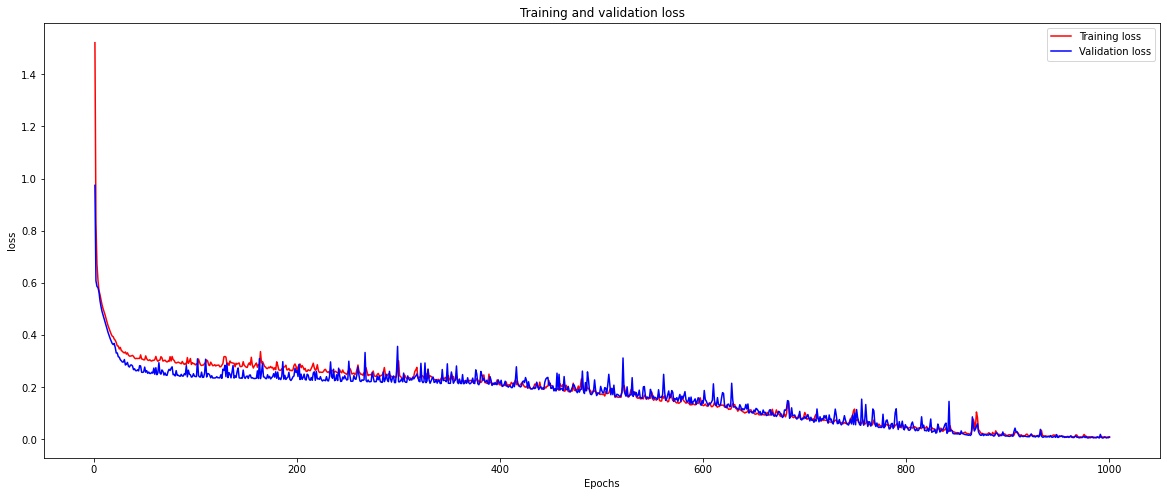

In [198]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)
plt.figure(figsize = (20, 8))
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

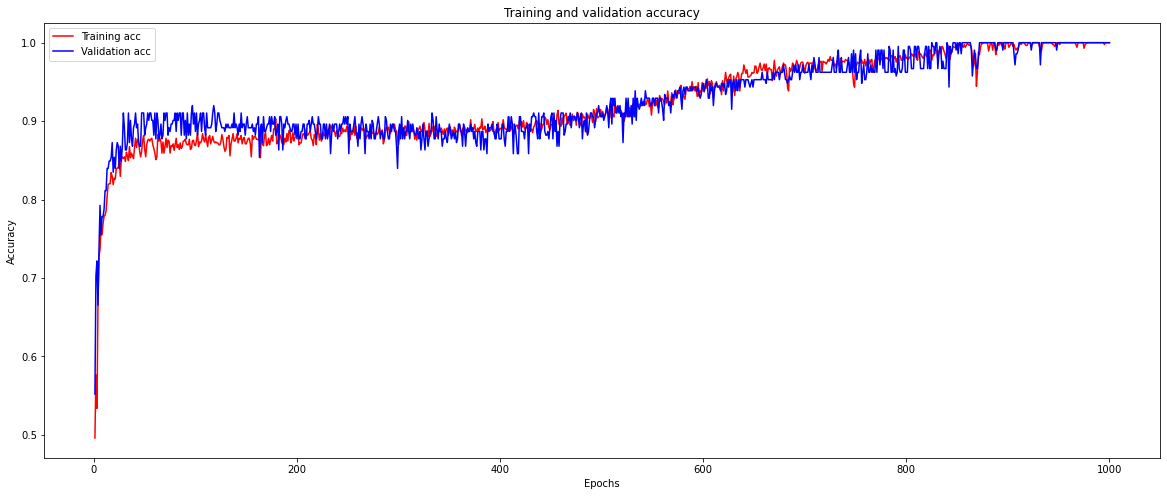

In [199]:
plt.clf()
acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']

plt.figure(figsize = (20, 8))
plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [186]:
# 학습한 모델 평가
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 712us/step - loss: 0.0085 - categorical_accuracy: 1.0000


[0.008466859348118305, 1.0]

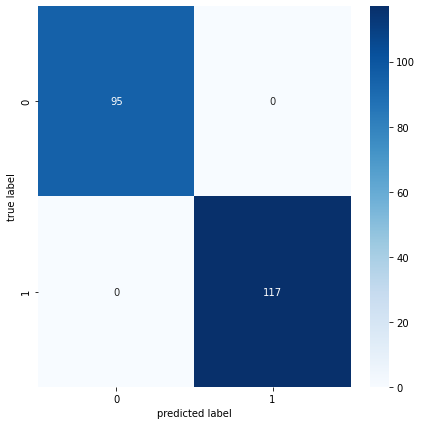

In [187]:
# 모델 평가
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

results = model.predict(X_test)
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [191]:
# 학습한 모델로 예측하기
import numpy as np
df_test_nt = df_test[x_list].to_numpy()
print(df_test_nt.shape)
result = model.predict(df_test_nt)
print(result.shape)
arg_result = np.argmax(result, axis = -1)
arg_result

(152, 9)
(152, 2)


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [193]:
# 정답파일 작성
predict = pd.read_csv(PATH + '\\sample_submission.csv')
len(predict), len(df_test)
predict.target = arg_result
predict.to_csv(PATH + '\\sample_submission(NT).csv', index = False)
pd.read_csv(PATH + '\\sample_submission(NT).csv').head()

,id,target
0,1,0
1,2,1
2,3,1
3,4,0
4,5,1
